In [1]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN_PATH = '../../../input/train_100_events'

In [115]:

event_prefix = 'event000001000'
hits, cells, particles, truth = load_event(os.path.join(TRAIN_PATH, event_prefix))

mem_bytes = (hits.memory_usage(index=True).sum() 
             + cells.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())
print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event000001000 memory usage 18.46 MB


In [4]:
print(hits.head())
print(len(hits))
print(len(hits[hits.layer_id == 2]))
print(len(hits[hits.layer_id == 14]))
print(np.unique(hits.volume_id))

print(particles.head())
print(len(particles))

print(cells.head())
print(len(cells))

print(truth.head())
print(len(truth))

my_volumes = [7,8,9]
part_hits = hits.loc[hits.volume_id.isin(my_volumes)]
print(len(part_hits))


   hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1
120939
29453
4578
[ 7  8  9 12 13 14 16 17 18]
        particle_id        vx        vy        vz         px         py  \
0  4503668346847232 -0.009288  0.009861 -0.077879  -0.055269   0.323272   
1  4503737066323968 -0.009288  0.009861 -0.077879  -0.948125   0.470892   
2  4503805785800704 -0.009288  0.009861 -0.077879  -0.886484   0.105749   
3  4503874505277440 -0.009288  0.009861 -0.077879   0.257539  -0.676718   
4  4503943224754176 -0.009288  0.009861 -0.077879  16.439400 -15.548900   

          pz  q  nhits  
0  -0.203492 -1      8  
1   2.010060  1     11  
2

In [5]:
# From the XY plane
g = sns.jointplot(hits.x, hits.y, size=12)

#Clear the axes containing the scatter plot
g.ax_joint.cla()
# Set the current axis to the parent of ax
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
print(hits.volume_id.unique())
for volume in volumes:
    v = hits[hits.volume_id == volume]
    # scattering the hit coordinates with the particle size = 1
    plt.scatter(v.x, v.y, s=1, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[ 7  8  9 12 13 14 16 17 18]


/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


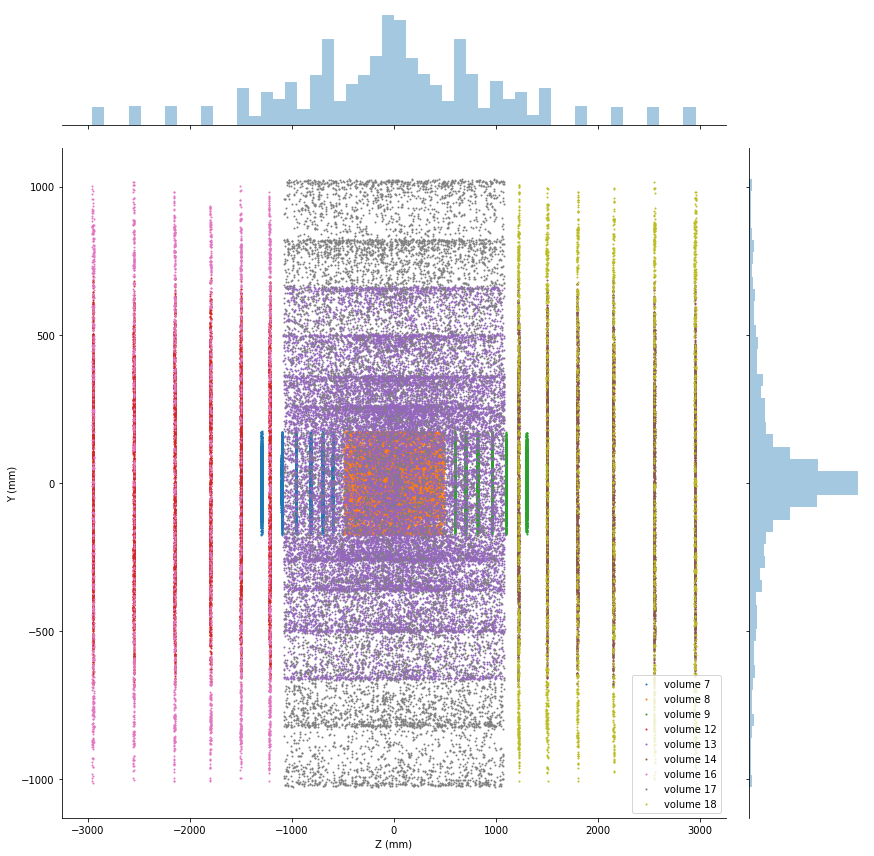

In [6]:
#From the YZ plane
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=1, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

In [7]:
# From XYZ 3D perspective
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()


/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


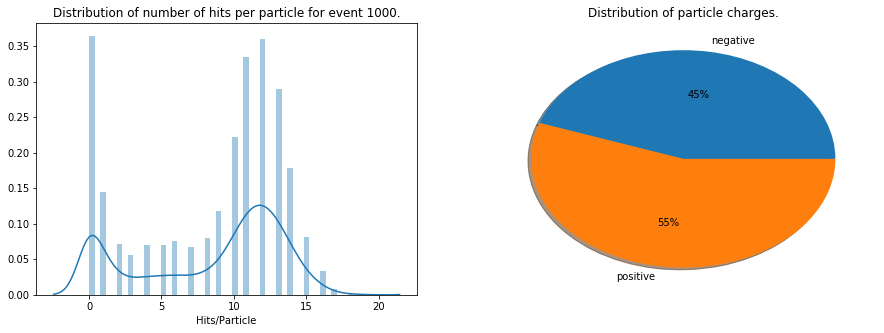

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(particles.nhits.values, axlabel='Hits/Particle', bins=50)
plt.title('Distribution of number of hits per particle for event 1000.')
plt.subplot(1, 2, 2)
plt.pie(particles.groupby('q')['vx'].count(),
        labels=['negative', 'positive'],
        autopct='%.0f%%',
        shadow=True,
        radius=1)
plt.title('Distribution of particle charges.')
plt.show()


/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nicole/anaconda3/envs/trackml/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


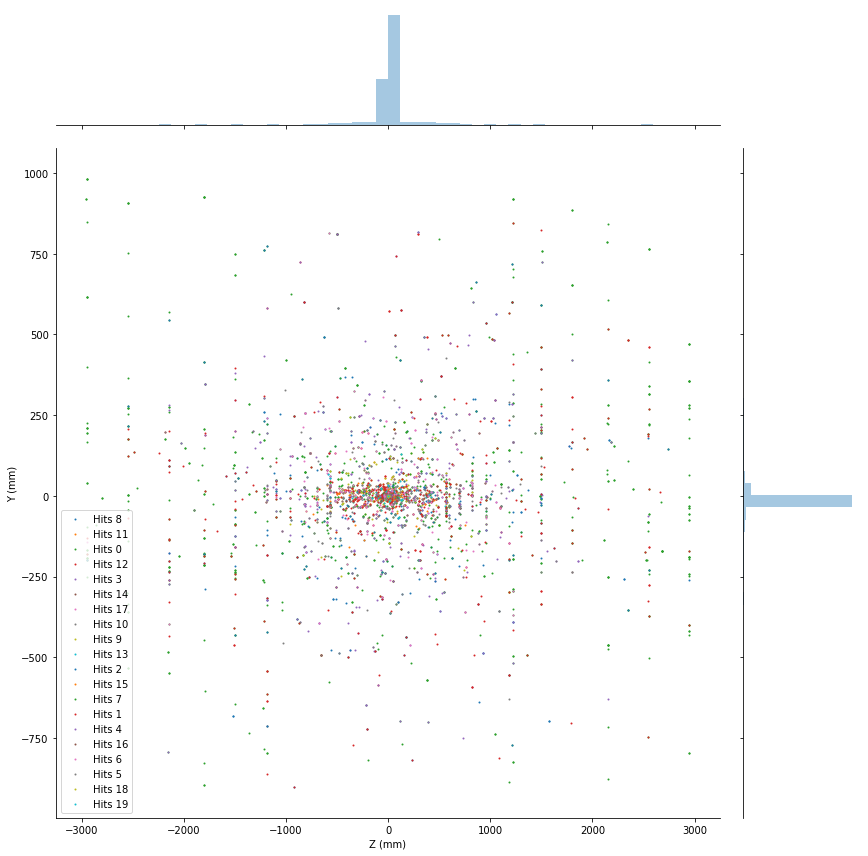

In [9]:
# Visualize the original particles of tracks, most particle collisions are generated from the origin

g = sns.jointplot(particles.vz, particles.vy,  s=3, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

n_hits = particles.nhits.unique()
for n_hit in n_hits:
    p = particles[particles.nhits == n_hit]
    plt.scatter(p.vz, p.vy, s=1, label='Hits {}'.format(n_hit))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

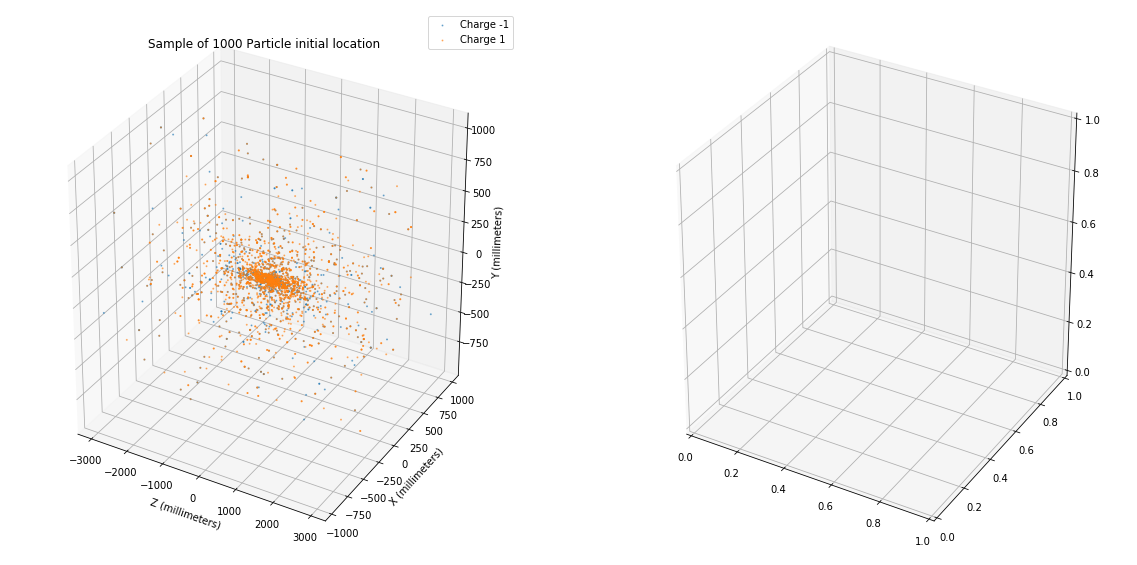

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(122, projection='3d')
ax = fig.add_subplot(121, projection='3d')

for charge in [-1, 1]:
    q = particles[particles.q == charge]
    ax.scatter(q.vz, q.vx, q.vy, s=1, label='Charge {}'.format(charge), alpha=0.5)
ax.set_title('Sample of 1000 Particle initial location')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.legend()
plt.show()

In [116]:
truth = truth.merge(hits, on=['hit_id'], how='left')


Hits counts: 2
191 out of 332 tracks are not passed in volume 7 8 9
0.5753012048192772% of the tracks are not passed in volume 7 8 9


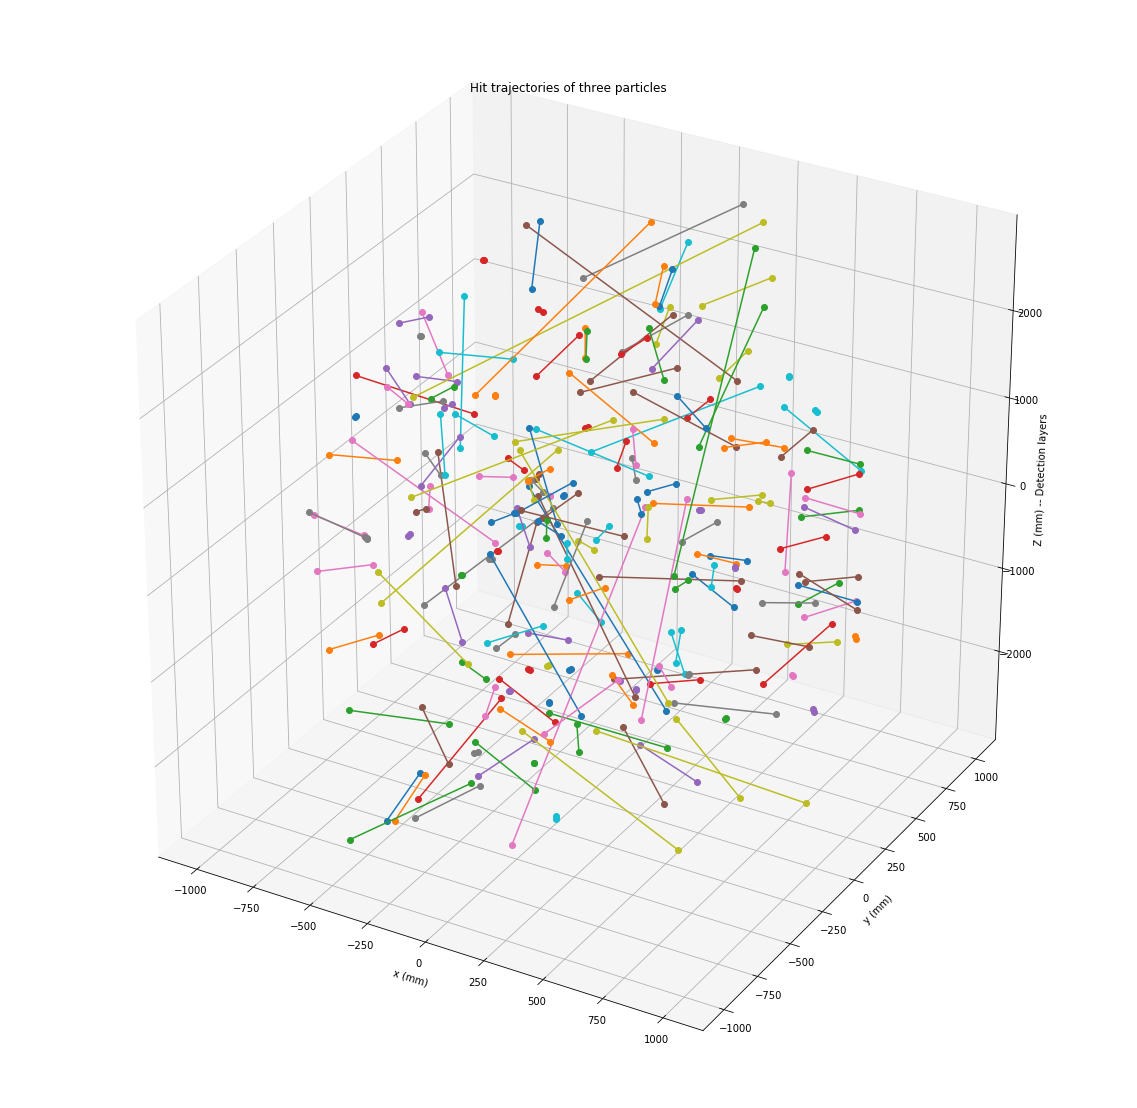

Hits counts: 3
130 out of 264 tracks are not passed in volume 7 8 9
0.49242424242424243% of the tracks are not passed in volume 7 8 9


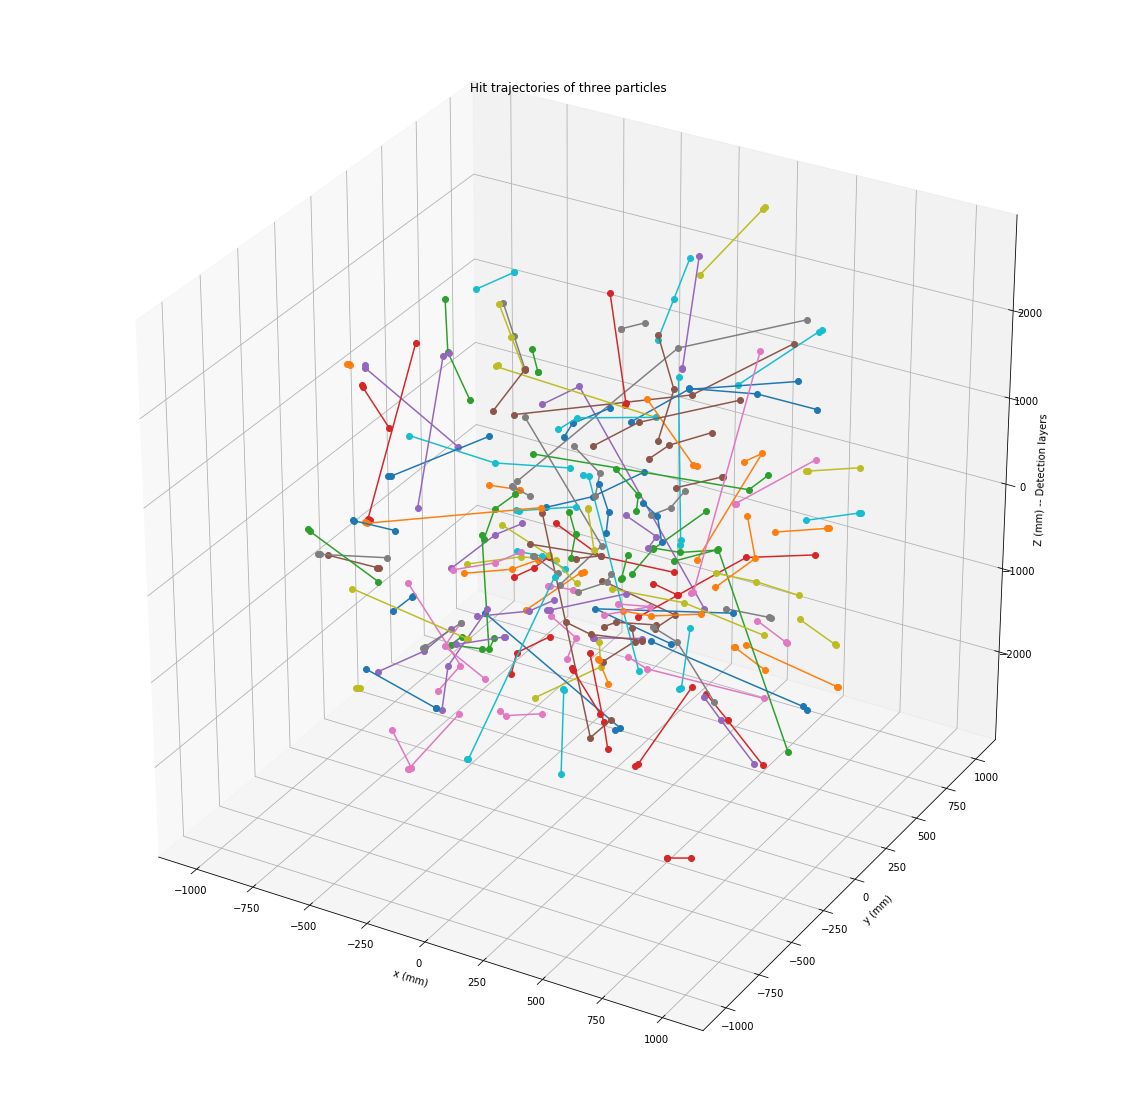

Hits counts: 4
164 out of 329 tracks are not passed in volume 7 8 9
0.49848024316109424% of the tracks are not passed in volume 7 8 9


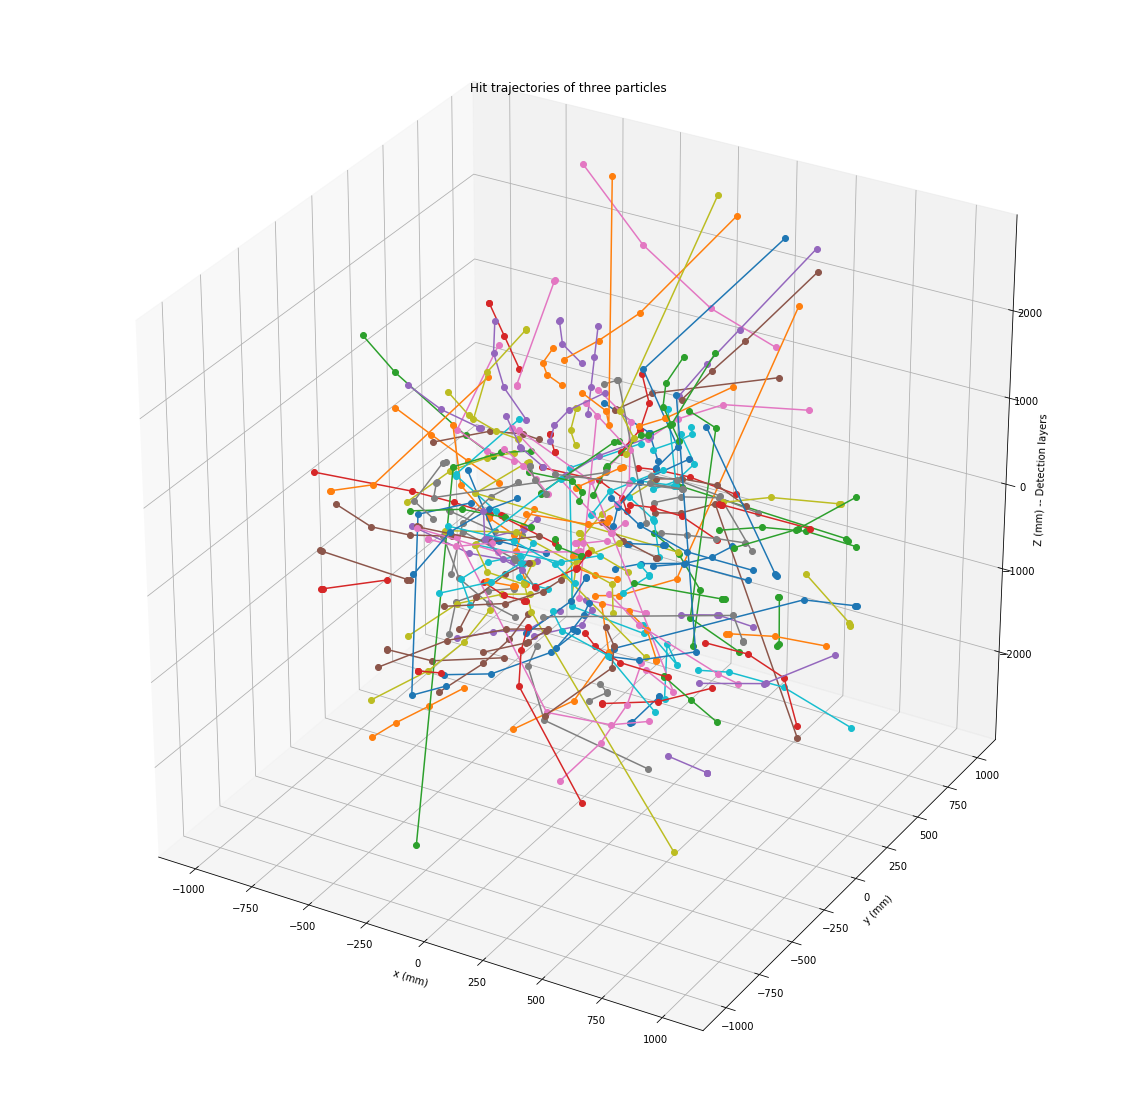

Hits counts: 5
129 out of 327 tracks are not passed in volume 7 8 9
0.3944954128440367% of the tracks are not passed in volume 7 8 9


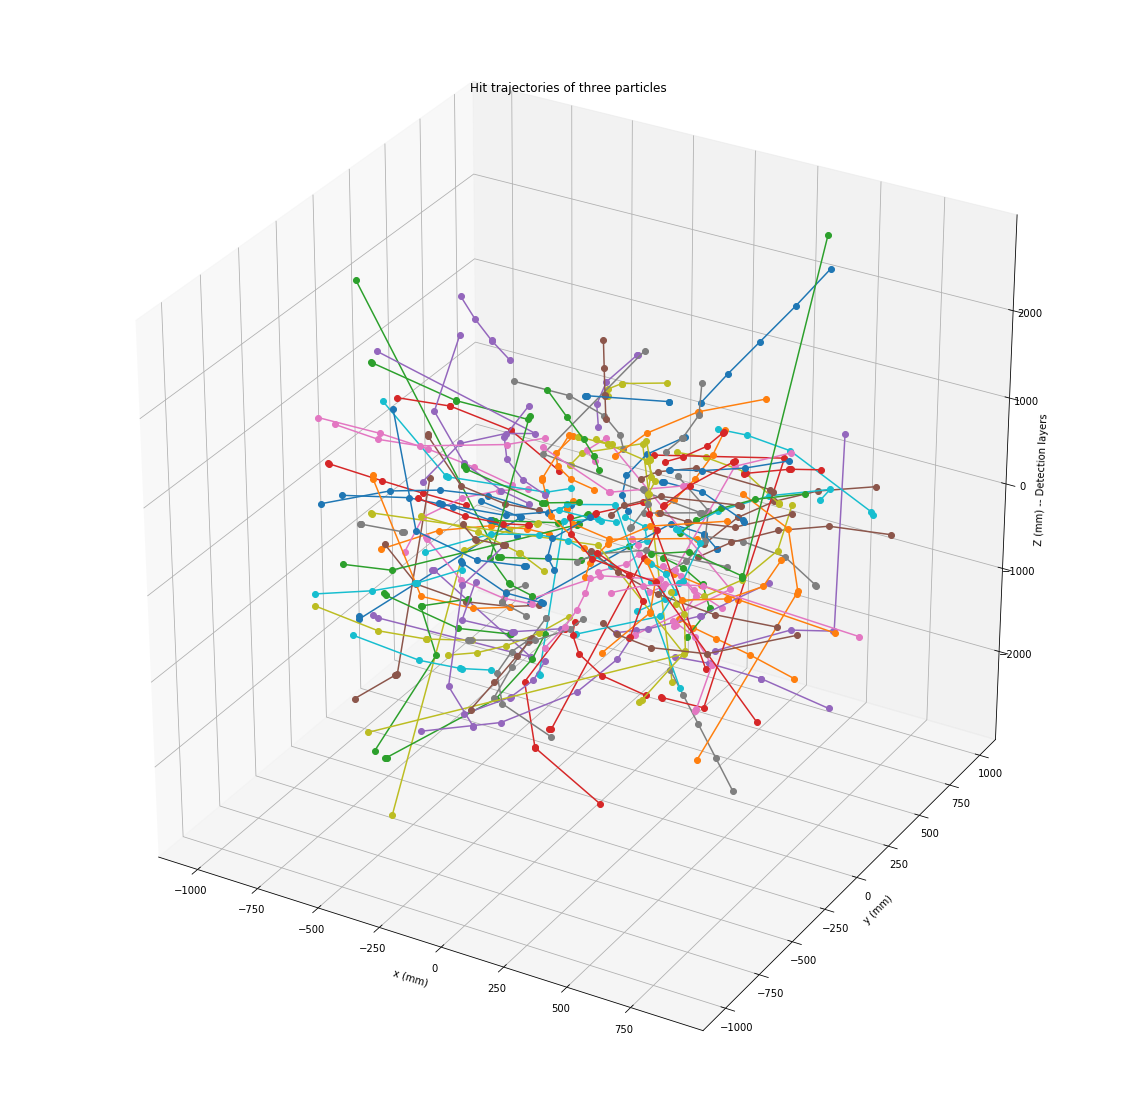

Hits counts: 6
154 out of 355 tracks are not passed in volume 7 8 9
0.43380281690140843% of the tracks are not passed in volume 7 8 9


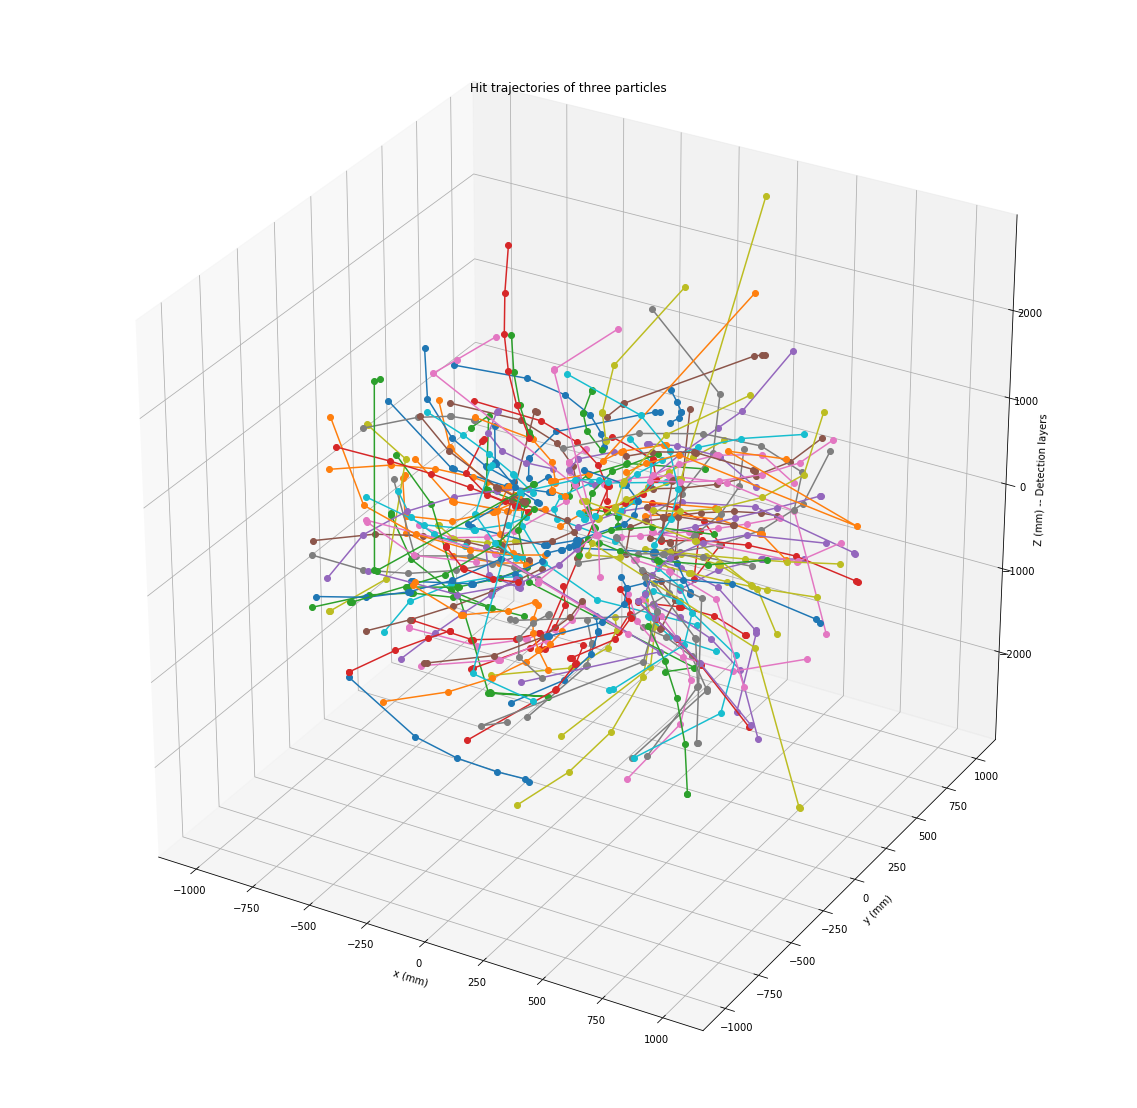

Hits counts: 7
112 out of 312 tracks are not passed in volume 7 8 9
0.358974358974359% of the tracks are not passed in volume 7 8 9


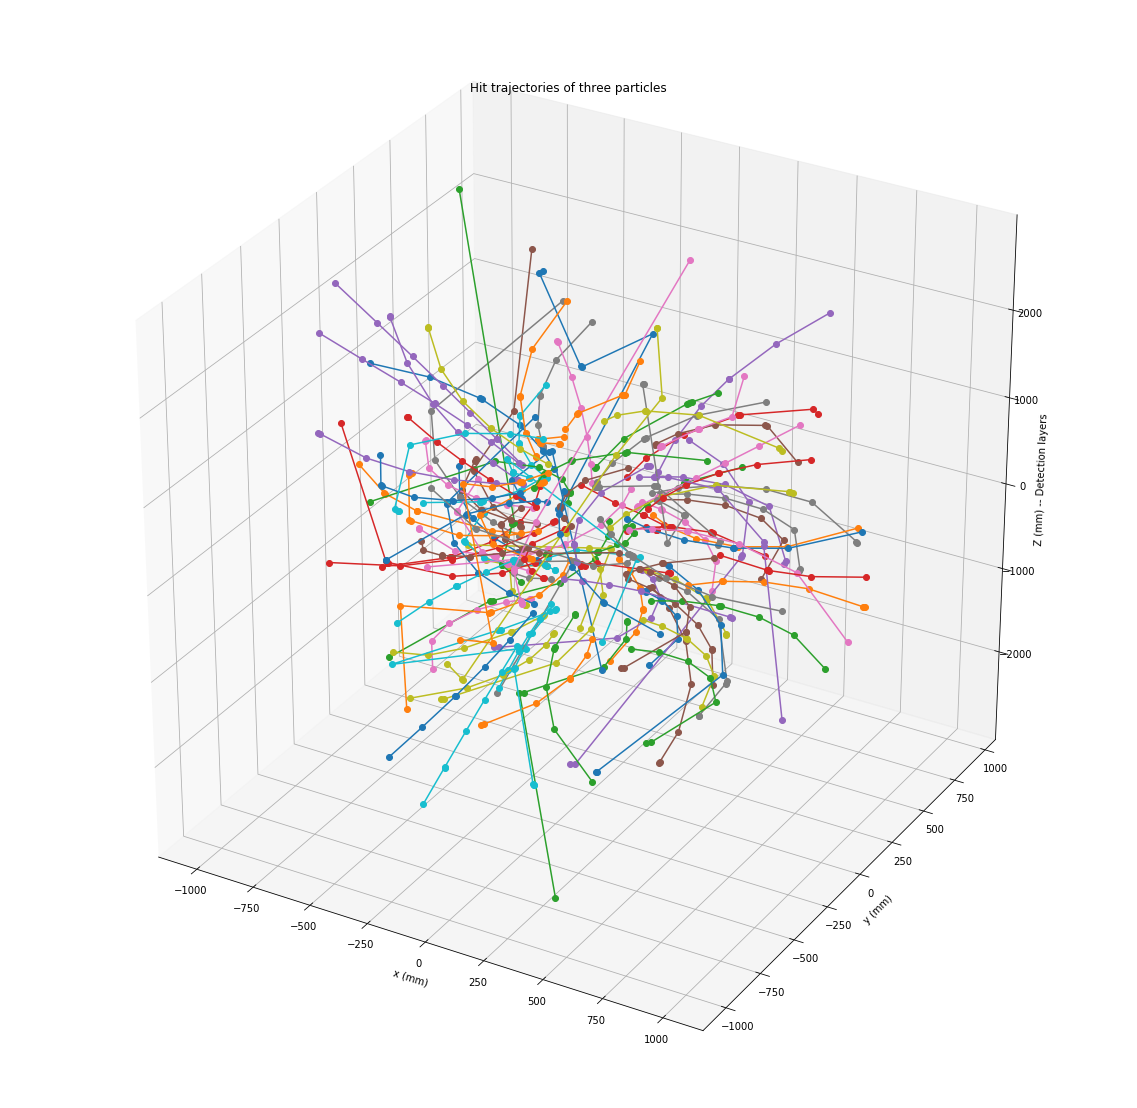

Hits counts: 8
68 out of 375 tracks are not passed in volume 7 8 9
0.18133333333333335% of the tracks are not passed in volume 7 8 9


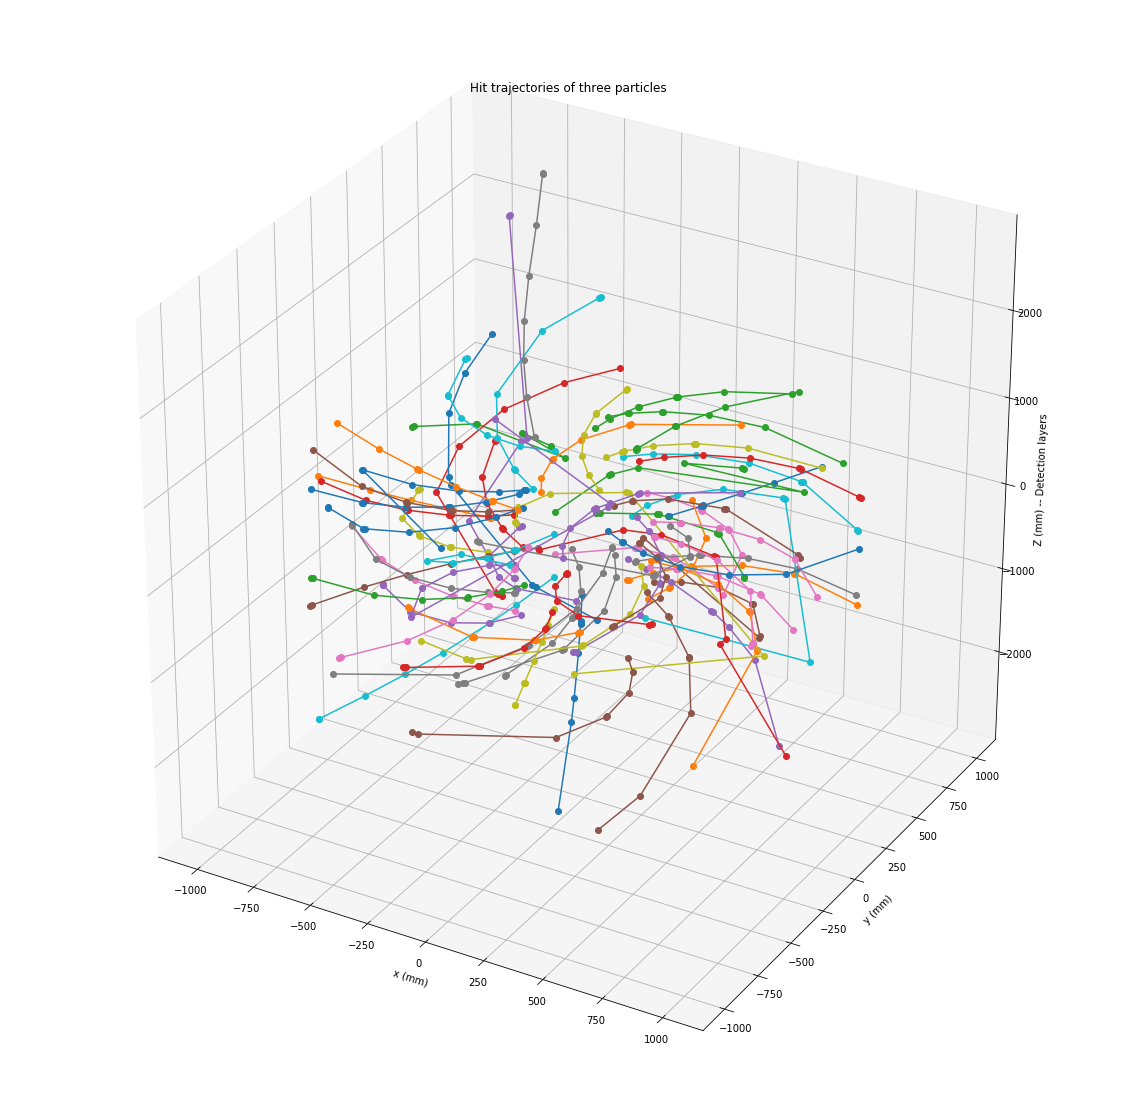

Hits counts: 9
42 out of 551 tracks are not passed in volume 7 8 9
0.07622504537205081% of the tracks are not passed in volume 7 8 9


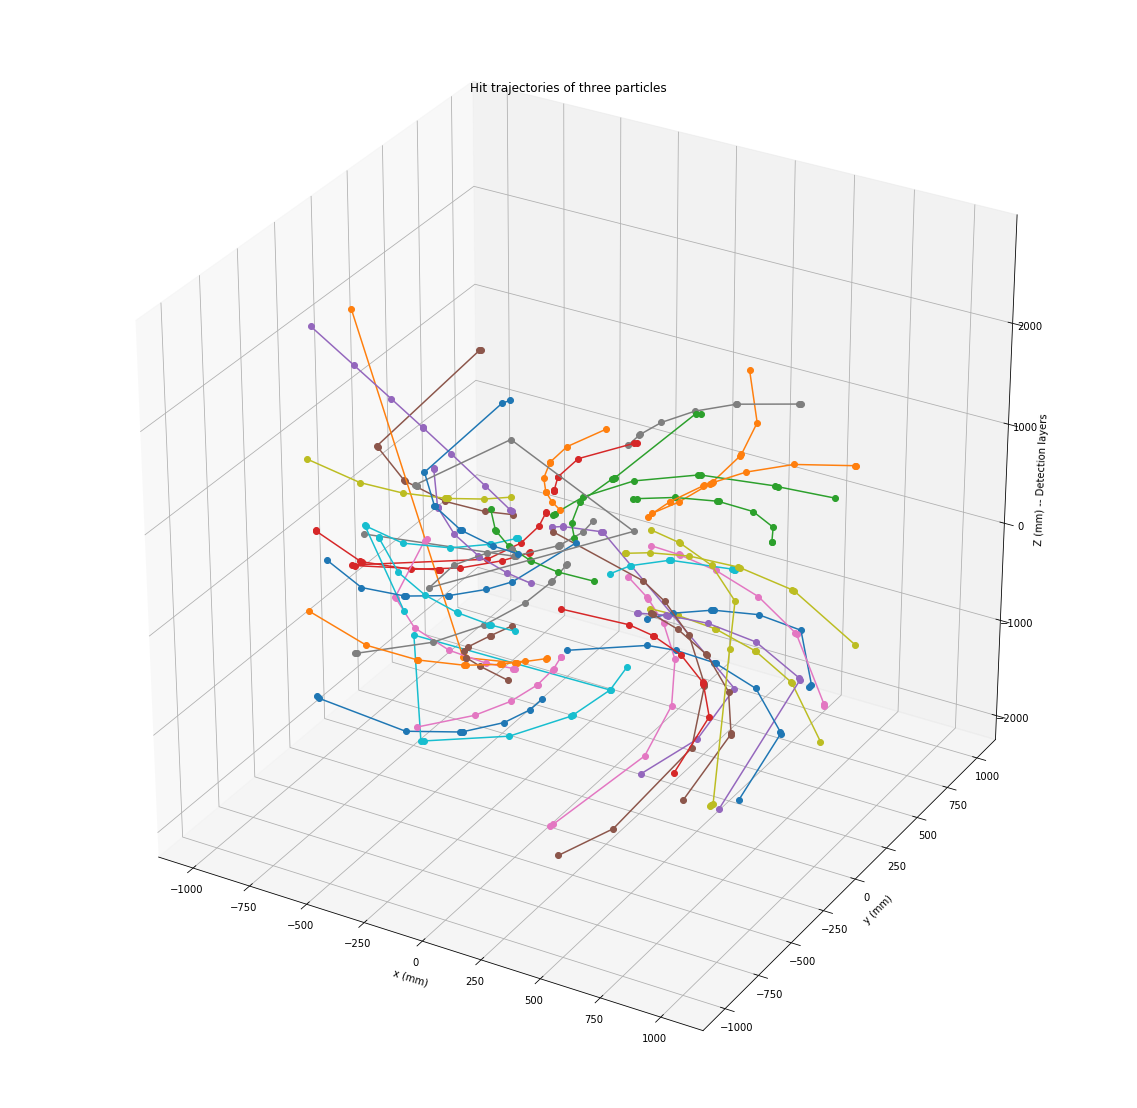

In [178]:

def get_track_not_origin(hit_count):
    particle_list = []
    p_traj_list = []

    for i in range(len(particles.loc[particles.nhits == hit_count])):
            particle_list.append(particles.loc[particles.nhits == hit_count].iloc[i])


    for i in range(len(particle_list)):
        p_traj_list.append(truth[truth.particle_id == particle_list[i].particle_id][['particle_id','tx', 'ty', 'tz', 'volume_id', 'layer_id', 'module_id']].sort_values(by='tz'))


    #true false
    p_traj_list2 = []

    for i in range(len(p_traj_list)):
        count = 0
        for _, row in p_traj_list[i].iterrows():
            count = count+1
            if row.volume_id in ([7,8,9]):
                break
            else:
                if count == hit_count-1:
                    p_traj_list2.append(p_traj_list[i])
                    break

    print('Hits counts: ' + str(hit_count))
    print(str(len(p_traj_list2)) + ' out of ' + str(len(p_traj_list)) + ' tracks are not passed in volume 7 8 9' )
    print(str(len(p_traj_list2)/len(p_traj_list))+ '% of the tracks are not passed in volume 7 8 9' )


    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
        
    for i in range(len(p_traj_list2)):
            ax.plot(
                xs=p_traj_list2[i].tx,
                ys=p_traj_list2[i].ty,
                zs=p_traj_list2[i].tz, marker='o')

    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('Z (mm) -- Detection layers')
    plt.title('Hit trajectories of three particles')
    plt.show()
    

for i in range(2,10):
    get_track_not_origin(i)


         particle_id        vx        vy        vz        px        py  \
10  4504561700044800 -0.009288  0.009861 -0.077879 -0.249551 -0.434369   

          pz  q  nhits  
10 -0.189168 -1     10  


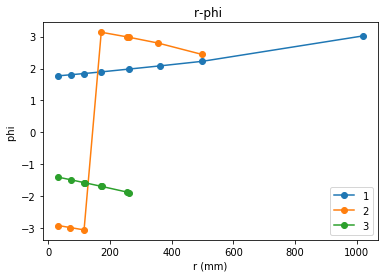

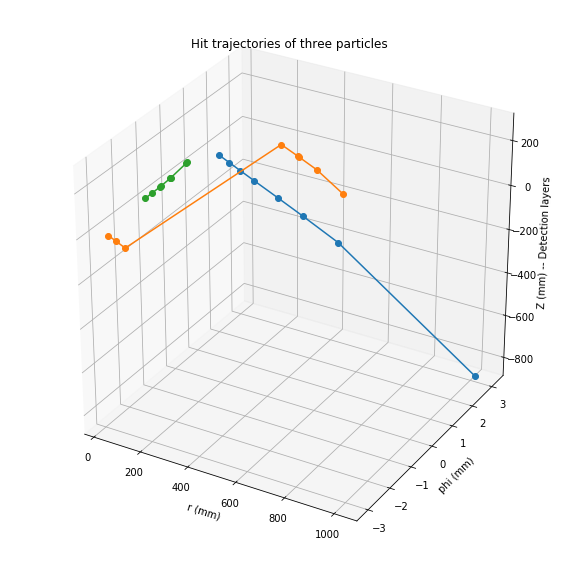

In [114]:
HIT_COUNT = 8
particle1 = particles.loc[particles.nhits == HIT_COUNT].iloc[0]
particle2 = particles.loc[particles.nhits == HIT_COUNT].iloc[1]
particle3 = particles.loc[particles.nhits == HIT_COUNT].iloc[2]

#print(truth.loc[truth.particle_id == 4504561700044800])
print(particles.loc[particles.particle_id == 4504561700044800])

cond = np.where(truth.volume_id.notnull())

truth = truth.loc[cond]


p_traj_surface1 = truth[truth.particle_id == particle1.particle_id][['particle_id','tx', 'ty', 'tz', 'volume_id', 'layer_id', 'module_id']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['particle_id','tx', 'ty', 'tz',  'volume_id', 'layer_id', 'module_id']]
p_traj_surface3 = truth[truth.particle_id == particle3.particle_id][['particle_id','tx', 'ty', 'tz',  'volume_id', 'layer_id', 'module_id']]


p_traj1 = p_traj_surface1
p_traj2 = p_traj_surface2
p_traj3 = p_traj_surface3


# p_traj1 = (p_traj_surface1
#           .append({'tx': particle1.vx, 'ty': particle1.vy, 'tz': particle1.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# p_traj2 = (p_traj_surface2
#           .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# p_traj3 = (p_traj_surface3
#           .append({'tx': particle3.vx, 'ty': particle3.vy, 'tz': particle3.vz}, ignore_index=True)
#           .sort_values(by='tz'))

# Visualize XY projection to the Z-axis

r1 = np.sqrt(p_traj1.tx**2 + p_traj1.ty**2)
phi1 = np.arctan2(p_traj1.ty, p_traj1.tx)


r2 = np.sqrt(p_traj2.tx**2 + p_traj2.ty**2)
phi2 = np.arctan2(p_traj2.ty, p_traj2.tx)


r3 = np.sqrt(p_traj3.tx**2 + p_traj3.ty**2)
phi3 = np.arctan2(p_traj3.ty, p_traj3.tx)


plt.plot(r1, phi1, '-o', label='1')
plt.plot(r2, phi2, '-o', label='2')
plt.plot(r3, phi3, '-o', label='3')
plt.xlabel('r (mm)')
plt.ylabel('phi ')
plt.title('r-phi ')

# plt.plot(p_traj1.tz, p_traj1.ty, '-o', label='hits')
# plt.plot(p_traj2.tz, p_traj2.ty, '-o', label='hits')
# plt.plot(p_traj3.tz, p_traj3.ty, '-o', label='hits')
# plt.xlabel('Z (mm)')
# plt.ylabel('y ')
# plt.title('ZY projection to the X-axis')



plt.legend()
plt.show()





fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# ax.plot(
#     xs=p_traj1.tx,
#     ys=p_traj1.ty,
#     zs=p_traj1.tz, marker='o')
# ax.plot(
#     xs=p_traj2.tx,
#     ys=p_traj2.ty,
#     zs=p_traj2.tz, marker='o')
# ax.plot(
#     xs=p_traj3.tx,
#     ys=p_traj3.ty,
#     zs=p_traj3.tz, marker='o')


ax.plot(
    xs=r1,
    ys=phi1,
    zs=p_traj1.tz, marker='o')
ax.plot(
    xs=r2,
    ys=phi2,
    zs=p_traj2.tz, marker='o')
ax.plot(
    xs=r3,
    ys=phi3,
    zs=p_traj3.tz, marker='o')




ax.set_xlabel('r (mm)')
ax.set_ylabel('phi (mm)')
ax.set_zlabel('Z (mm) -- Detection layers')
plt.title('Hit trajectories of three particles')
plt.show()